Copula Test #1
https://sdv.dev/Copulas/

x: Beta distribution with a=0.1 and b=0.1

y: Beta distribution with a=0.1 and b=0.5

z: Normal distribution + 10 times y

In [1]:
!pip install copulas
from copulas.datasets import sample_trivariate_xyz

real_data = sample_trivariate_xyz()
real_data.head()

,x,y,z
0,9.004177e-05,2.883992e-06,0.638689
1,8.819273e-01,2.911979e-07,1.058121
2,5.003865e-01,4.886504e-04,0.372506
3,1.838544e-12,5.392802e-02,0.687370
4,1.627915e-01,1.634269e-08,-0.881068


In [2]:
from copulas.multivariate import GaussianMultivariate

copula = GaussianMultivariate()
copula.fit(real_data)

synthetic_data = copula.sample(len(real_data))

C:\Users\stuar\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\stuar\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\stuar\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\stuar\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5311: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
C:\Users\stuar\anaconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


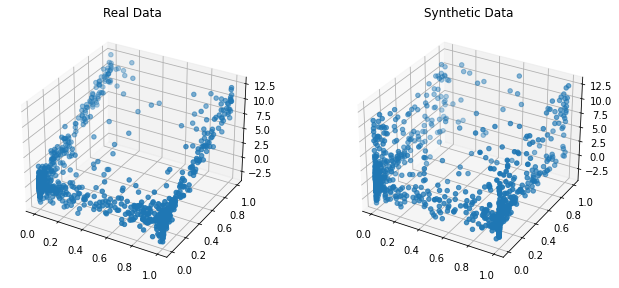

In [3]:
from copulas.visualization import compare_3d

compare_3d(real_data, synthetic_data)

There are three types of Vine copulas: direct, regular, and center.

In [4]:
from copulas.multivariate import VineCopula

center = VineCopula('center')
regular = VineCopula('regular')
direct = VineCopula('direct')

center.fit(real_data)
regular.fit(real_data)
direct.fit(real_data)

center_samples = center.sample(1000)
regular_samples = regular.sample(1000)
direct_samples = direct.sample(1000)


synthetic_data = copula.sample(len(real_data))

C:\Users\stuar\anaconda3\lib\site-packages\copulas\multivariate\vine.py:73: UserWarning: Vines have not been fully tested on Python 3.8 and might produce wrong results. Please use Python 3.5, 3.6 or 3.7
  warnings.warn(
C:\Users\stuar\anaconda3\lib\site-packages\copulas\bivariate\base.py:162: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)


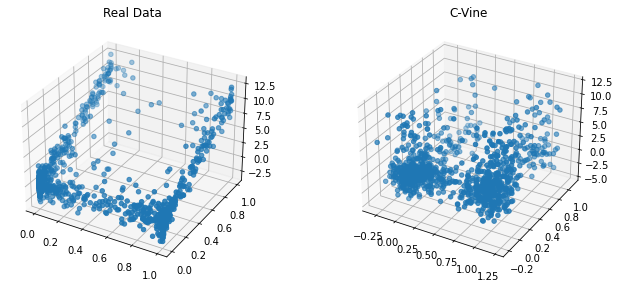

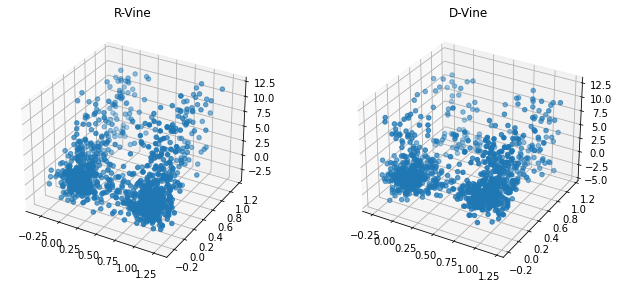

In [5]:
from copulas.visualization import side_by_side, scatter_3d

side_by_side(scatter_3d, {'Real Data': real_data, 'C-Vine': center_samples})
side_by_side(scatter_3d, {'R-Vine': regular_samples, 'D-Vine': direct_samples})

https://sdv.dev/Copulas/api/copulas.bivariate.html

https://sdv.dev/Copulas/tutorials/04_Syntehtic_Data_for_Machine_Learning.html

In [6]:
from copulas.datasets import sample_bivariate_age_income

real_data = sample_bivariate_age_income()
real_data.head()

,age,income
0,48.935913,399.161393
1,39.234323,364.225531
2,55.659901,406.475105
3,31.810637,341.276022
4,65.342336,414.347815


Stu - by studying MATLAB we now see we need to calculate empiricial CDF before using
archimedean compula Frank, Clayton and Gumbel. Shame no python docs here!
Lets do this now then. I guess we want a cdf density and inverse sample that.
https://uk.mathworks.com/help/stats/copulafit.html

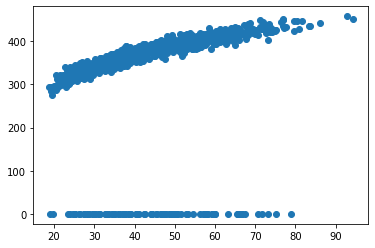

In [7]:
import matplotlib.pyplot as plt

plt.scatter(real_data.iloc[:,0],real_data.iloc[:,1])
plt.show()

In [8]:
from copulas.bivariate import Bivariate,CopulaTypes
import numpy as np
# from scipy import stats
import matplotlib.pyplot as plt
# from sklearn.neighbors import KernelDensity

# we found no useful cdf or inv_cdf with scipy or sklearn.. ppf will be needed later
# code deleted in this cell in favour of method below.

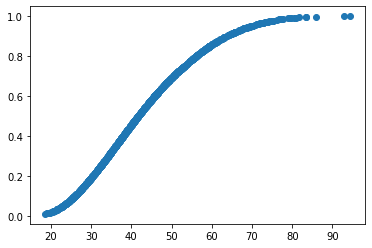

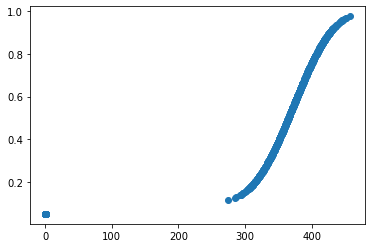

In [9]:
from copulas.univariate import GaussianKDE
# https://sdv.dev/Copulas/tutorials/02_Univariate_Distributions.html#Fitting-the-model
#beta = BetaUnivariate() #alternatives
# beta.fit(data)
def gauss_density_cdf(data):
    kde = GaussianKDE()
    kde.fit(data)

    cumulative_distribution = kde.cumulative_distribution(data)    
    plt.scatter(data,cumulative_distribution)
    plt.show()
    return cumulative_distribution, kde
normed_x,kde1 = gauss_density_cdf(real_data.iloc[:,0])
normed_y,kde2 = gauss_density_cdf(real_data.iloc[:,1])

In [10]:
hhm = np.stack([normed_x,normed_y],axis=1)
np.shape(hhm)

(1000, 2)

In [11]:
copula = Bivariate(copula_type=CopulaTypes.FRANK)
copula.fit(np.stack([normed_x,normed_y],axis=1))

synthetic_data = copula.sample(len(real_data))

C:\Users\stuar\anaconda3\lib\site-packages\copulas\bivariate\base.py:162: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn('Data does not appear to be uniform.', category=RuntimeWarning)


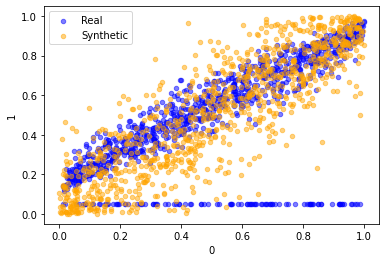

In [12]:
import pandas as pd
from copulas.visualization import compare_2d
normed_df = pd.DataFrame(data=np.stack([normed_x,normed_y],axis=1))
synth_df = pd.DataFrame(data=synthetic_data)
compare_2d(normed_df, synth_df)

In [13]:
def inv_cdf_postCopula(cumulative_distribution,kde):
    result = kde.ppf(cumulative_distribution )
    return result
new_x = inv_cdf_postCopula(synthetic_data[:,0],kde1)
new_y = inv_cdf_postCopula(synthetic_data[:,1],kde2)

ok so now lets put into reverse normalise mode and return usual range of values

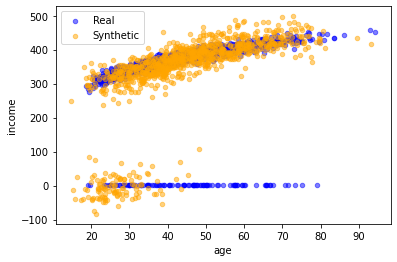

In [14]:
synth_df = pd.DataFrame(data=np.stack([new_x,new_y],axis=1),columns=real_data.columns)
compare_2d(real_data, synth_df)

If we use 'univariate' more generally.. it seems to suggest best fit.. gaussKDE in this case.

In [15]:
from copulas.univariate import Univariate
data = real_data.iloc[:,1]
univariate = Univariate()
univariate.fit(data)
params = univariate.to_dict()
params['type']

C:\Users\stuar\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\stuar\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\stuar\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


'copulas.univariate.gaussian_kde.GaussianKDE'

In any case, if we use the libraries default it'll work just fine on 2d or higher dimensional data

In [16]:
copula = GaussianMultivariate()
copula.fit(real_data)

synthetic_data = copula.sample(len(real_data))

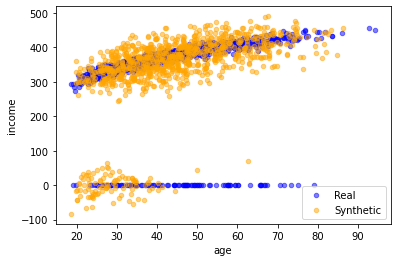

In [17]:
from copulas.visualization import compare_2d

compare_2d(real_data, synthetic_data)

In [18]:
params = copula.to_dict()

In [19]:
params['type']

'copulas.multivariate.gaussian.GaussianMultivariate'

In [20]:
params['covariance']

[[1.0, 0.6595774482108782], [0.6595774482108782, 1.0]]

In [21]:
params['univariates'][0]

{'loc': 18.21096059018974,
 'scale': 86.81396581458543,
 'a': 1.9957417801944954,
 'b': 4.878446510002986,
 'type': 'copulas.univariate.beta.BetaUnivariate'}

In [22]:
params['univariates'][0]

{'loc': 18.21096059018974,
 'scale': 86.81396581458543,
 'a': 1.9957417801944954,
 'b': 4.878446510002986,
 'type': 'copulas.univariate.beta.BetaUnivariate'}

Finally, this parameters dictionary can be later on passed to the Multivariate.from_dict class method, which will create an instance of our model with the same parameters as before.

In [23]:
from copulas.multivariate import Multivariate

new_dist = Multivariate.from_dict(params)

new_dist

GaussianMultivariate()

Lets save more formally as a pickle.

In [24]:
model_path = 'mymodel.pkl'
copula.save(model_path)

In [25]:
new_copula = GaussianMultivariate.load(model_path)